zip file exists, so it will be used directly

Rows:  400 
Columns:  26
               id         age          bp          sg          al          su  \
count  400.000000  391.000000  388.000000  353.000000  354.000000  351.000000   
mean   199.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   17.169714   13.683637    0.005717    1.352679    1.099191   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%     99.750000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    199.500000   55.000000   80.000000    1.020000    0.000000    0.000000   
75%    299.250000   64.500000   80.000000    1.020000    2.000000    0.000000   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  
count  356.000000  381.000000  383.000000  313.000000  312.000000  348.000000  
mean   148.036517   57.425722    3.0724

/tmp/ipykernel_13770/555047959.py:41: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(index=age_bins, columns=bp_bins, values='bp', aggfunc='mean', fill_value=0)


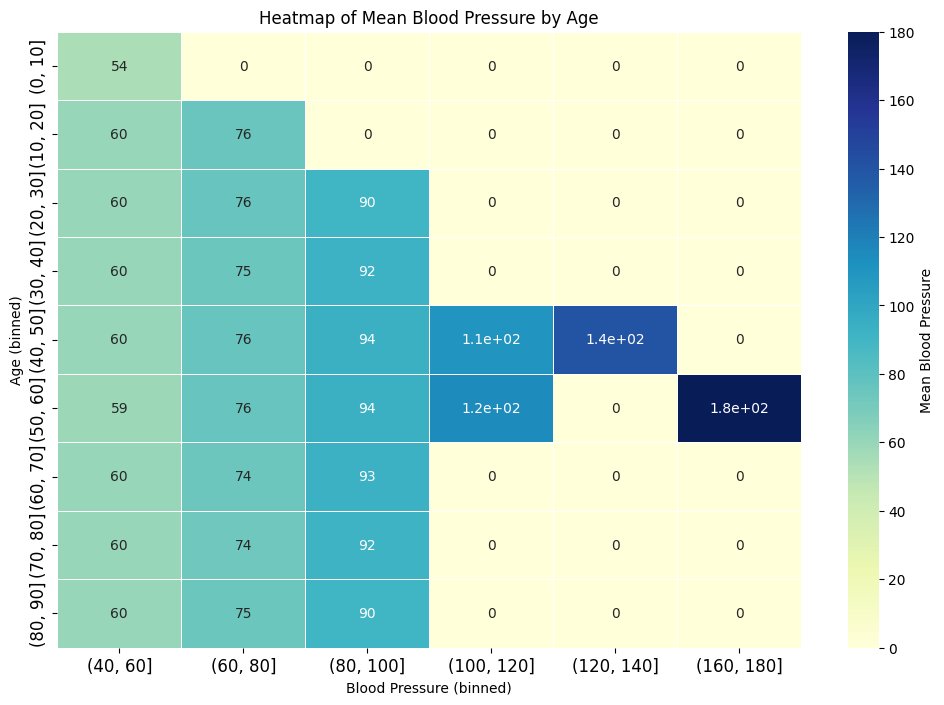

In [9]:
import os
import json as js
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Kaggle credentials
with open('kaggle.json') as f:
    data = js.load(f)
    username = data['username']
    keys = data['key']

# Set Kaggle environment variables
os.environ['KAGGLE_USERNAME'] = username
os.environ['KAGGLE_KEY'] = keys

# Check for zip file existence
path_to_zip_file = 'ckdisease.zip'
if not os.path.exists(path_to_zip_file):
    print('zip file does not exist, so the file will be downloaded')
    os.system('kaggle datasets download -d mansoordaku/ckdisease')
else:
    print('zip file exists, so it will be used directly\n')

# Read the CSV file from the zip archive
df = pd.read_csv(path_to_zip_file)

# Print shape of the DataFrame
rows, columns = df.shape
print('Rows: ', rows, '\nColumns: ', columns)

# Describing the data
print(df.describe())

# Create bins for 'age' and 'bp'
age_bins = pd.cut(df['age'], bins=np.arange(0, 100, 10))
bp_bins = pd.cut(df['bp'], bins=np.arange(0, 200, 20))

# Create a pivot table with mean values of 'bp'
heatmap_data = df.pivot_table(index=age_bins, columns=bp_bins, values='bp', aggfunc='mean', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', linewidths=0.5, cbar_kws={'label': 'Mean Blood Pressure'})
plt.title('Heatmap of Mean Blood Pressure by Age')
plt.xlabel('Blood Pressure (binned)')
plt.ylabel('Age (binned)')

# Set the font size of the annotations
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()
